In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [44]:
df.shape

(5572, 4)

In [45]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [46]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [47]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

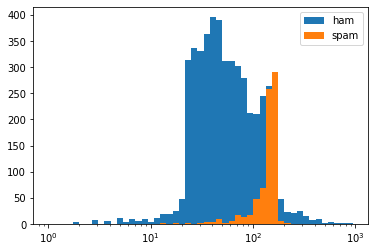

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins = bins)
plt.hist(df[df['label']=='spam']['length'], bins = bins)
plt.legend(('ham','spam'))
plt.show()


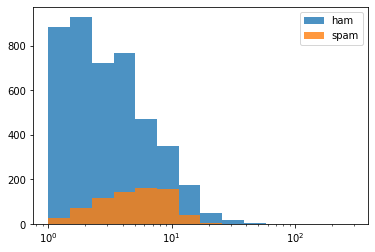

In [49]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [50]:
X = df[['length','punct']] 
y = df['label']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


In [52]:
y_train.value_counts()

ham     3232
spam     501
Name: label, dtype: int64

In [53]:
y_test.value_counts()

ham     1593
spam     246
Name: label, dtype: int64

In [54]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
from sklearn import metrics

pred=lr_model.predict(X_test)

print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))
print(metrics.accuracy_score(y_test,pred))

[[1547   46]
 [ 241    5]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839

0.843936922240348


In [56]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB()
m.fit(X_train,y_train)
pred = m.predict(X_test)

print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))
print(metrics.accuracy_score(y_test,pred))

[[1583   10]
 [ 246    0]]
              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839

0.8607939097335509


In [57]:
from sklearn.svm import SVC
m=SVC(gamma ='auto')
m.fit(X_train,y_train)
pred = m.predict(X_test)

print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))
print(metrics.accuracy_score(y_test,pred))

[[1515   78]
 [ 131  115]]
              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839

0.8863512778684067


In [58]:
from sklearn.model_selection import train_test_split

X = df['message']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [59]:
y_train.value_counts()

ham     3232
spam     501
Name: label, dtype: int64

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
c_v = CountVectorizer()

X_counts = c_v.fit_transform(X_train)
X_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [61]:
type(X_counts)


scipy.sparse.csr.csr_matrix

In [62]:
X_counts.shape

(3733, 7082)

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_idf=TfidfTransformer()

X_tfidf = tf_idf.fit_transform(X_counts)
X_tfidf.shape

(3733, 7082)

In [64]:
ddff = pd.DataFrame(X_tfidf)

In [65]:
ddff[0]

0         (0, 7069)\t0.6019702680143677\n  (0, 4415)\t...
1         (0, 7048)\t0.06220835924135395\n  (0, 6330)\...
2         (0, 4959)\t0.5639269003584342\n  (0, 4583)\t...
3         (0, 6219)\t0.15567219572424026\n  (0, 4470)\...
4         (0, 7048)\t0.2119138905992704\n  (0, 6330)\t...
                              ...                        
3728      (0, 7048)\t0.10087994978401515\n  (0, 6928)\...
3729      (0, 5795)\t0.5474874445685368\n  (0, 3794)\t...
3730      (0, 5800)\t0.44622014318070863\n  (0, 5799)\...
3731      (0, 6345)\t0.4026376302519309\n  (0, 5520)\t...
3732      (0, 6119)\t0.4501915902498888\n  (0, 5763)\t...
Name: 0, Length: 3733, dtype: object

we did countvectorizer then , tfidf transformer

it's same as doing just tfidf vectorizer

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

In [67]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [69]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf' , LinearSVC())
                     ])
text_clf.fit(X_train,y_train)

p = text_clf.predict(X_test)

In [71]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,p))

[[1586    7]
 [  12  234]]


In [72]:
print(metrics.classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [73]:
print(metrics.accuracy_score(y_test,predictions))

0.843936922240348
